In [1]:
# 패키지 임포트
import pandas as pd
import numpy as np

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# 실습 데이터 불러오기
all_df = pd.read_csv('C:\\Users\\wai\\Desktop\\프로젝트\\교육자료\\교육데이터\\kaggle\\train.csv')
df = all_df.sample(frac=0.7) # 학습데이터 : 테스트 데이터 = 7 : 3 
test_df = all_df.drop(index=df.index)
print('전체 건수 :', len(all_df), 'train 건수 :', len(df), 'test 건수 :', len(test_df))

전체 건수 : 381109 train 건수 : 266776 test 건수 : 114333


In [11]:
### 실습 1) 정규성 검정
# 참고문헌 : https://alex-blog.tistory.com/entry/t-test-ANOVA-%EC%89%BD%EA%B2%8C%EC%89%BD%EA%B2%8C-%EA%B8%B0%EC%96%B5%ED%95%98%EC%9E%90
from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.stattools import omni_normtest, jarque_bera

# 검정 대상 변수 : 'Vintage'
print('검정 대상 변수 \n', df.loc[:,'Vintage'])
# 실습 1-1) 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test)
print('콜모고로프-스미르노프 검정 :', kstest_normal(df.loc[:,'Vintage']))
# 실습 1-2) 옴니버스 검정(Omnibus Normality test)
print('옴니버스 검정 :', omni_normtest(df.loc[:,'Vintage']))
# 실습 1-3) 자크-베라 검정(Jarque–Bera test)
print('자크-베라 검정 :', jarque_bera(df.loc[:,'Vintage']))

검정 대상 변수 
 266685    298
99636     107
310296    221
287083    215
74507     238
         ... 
132295     62
271686     71
114800    295
231857    285
276978     40
Name: Vintage, Length: 266776, dtype: int64
콜모고로프-스미르노프 검정 : (0.05957358341702518, 0.0)
옴니버스 검정 : NormaltestResult(statistic=241699.55873292053, pvalue=0.0)
자크-베라 검정 : (16064.70654378, 0.0, 0.002318409713354053, 1.7978313162797506)


C:\Users\wai\Anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


########################################
독립변수명 : Region_Code
피어슨 상관계수 : (0.041996721169374834, 2.010515195117019e-104) , 스피어만 상관계수 SpearmanrResult(correlation=0.012573411700286929, pvalue=8.334336398323527e-11)


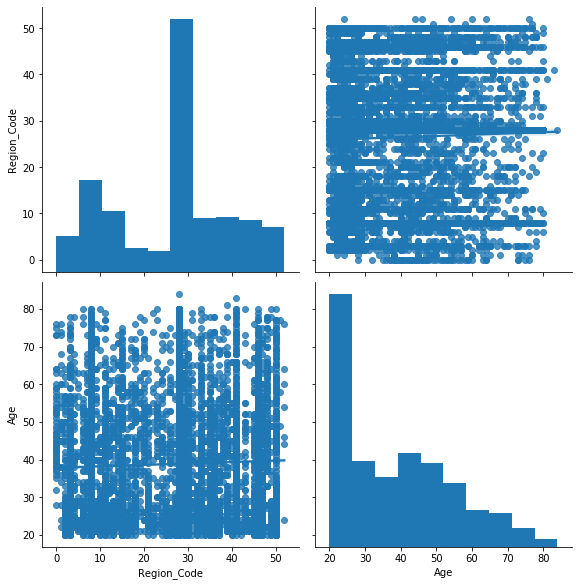

########################################
독립변수명 : Annual_Premium
피어슨 상관계수 : (0.06763617506926137, 5.548938374704702e-268) , 스피어만 상관계수 SpearmanrResult(correlation=0.09980931765842929, pvalue=0.0)


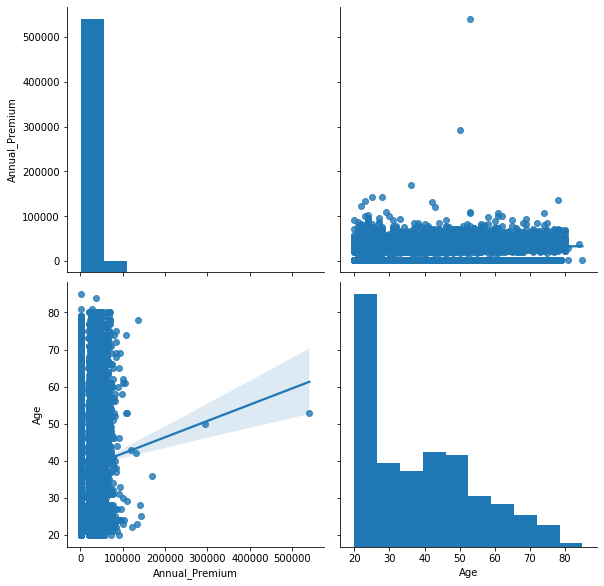

########################################
독립변수명 : Policy_Sales_Channel
피어슨 상관계수 : (-0.576870386609158, 0.0) , 스피어만 상관계수 SpearmanrResult(correlation=-0.6478038372960119, pvalue=0.0)


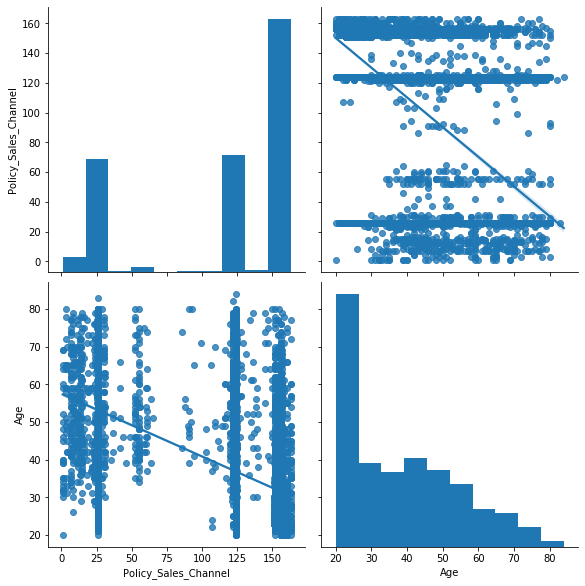

########################################
독립변수명 : Vintage
피어슨 상관계수 : (-0.0013538501278916805, 0.48438609253408355) , 스피어만 상관계수 SpearmanrResult(correlation=-0.0018289746490420796, pvalue=0.3448281898268597)


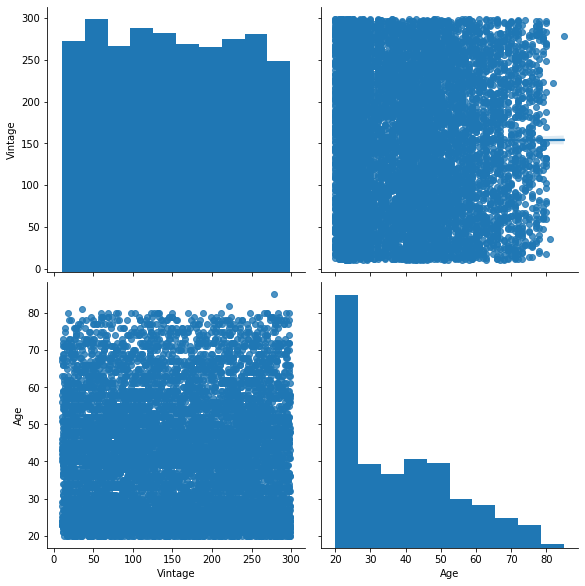

In [12]:
### 실습 2) 상관계수 검정
# Pearson, Spearman 상관계수는 -1 ~ +1 범위의 값, Pearson 상관 계수가 +1이 되도록 하기 위해 한 변수가 증가하면 다른 변수가 일정한 양만큼 증가합니다.
# => 이 관계는 완전한 선을 형성합니다. 이 경우 Spearman 상관 계수도 +1 입니다.

# 패키지 임포트
from scipy.stats import spearmanr, pearsonr

# 종속 및 독립변수 선정
var_tgt = 'Age' # 종속변수
inp_var_list = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'] # 독립변수 리스트
# spearmanr().correlation

# for 문으로 종속변수('Age')에 대한 독립변수 리스트 상관 관계 검정
for var in inp_var_list:
    print('#'*40)
    print('독립변수명 :',var)
    sprmn_cor = spearmanr(df[var], df[var_tgt])
    prsn_cor = pearsonr(df[var], df[var_tgt])
    print('피어슨 상관계수 :', prsn_cor, ', 스피어만 상관계수', sprmn_cor)

    # 1000건 샘플 plot 그래프
    sample_df = df[[var, var_tgt]].sample(n=10000)
    sns.pairplot(sample_df, kind='reg', height=4)
    plt.show()

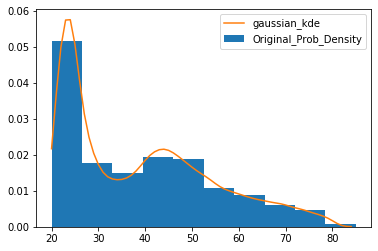

In [13]:
### 실습 3) 커널 밀도 추정
# 히스토그램과 같이 비모수 추정일 경우 불연속이라는 단점이 있지만, 부드러운(Smooth) 형태의 밀도함수를 추정하기 위해 사각형 kernel 대신 사용합니다.
# 패키지 임포트
from scipy.stats import gaussian_kde

kernel = gaussian_kde(df['Age'], bw_method='silverman')
age_min = df['Age'].min()
age_max = df['Age'].max()
X = np.arange(age_min, age_max, 1)
K = kernel(X)
# RAW 데이터의 확률밀도 히스토그램
plt.hist(df['Age'], label='Original_Prob_Density', density=True)
# 가우시안 커널 밀도 추정
plt.plot(X, K, label='gaussian_kde')
plt.legend()
plt.show()


In [14]:
### 실습 4) 회귀 분석(Linear Regression)

# 4-1) 선형 모형(Linear Model)
import statsmodels.api as sm

# 독립 및 종속변수 선정
var_tgt = 'Age' # 종속변수
inp_var_list = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'] # 독립변수 리스트

model = sm.OLS.from_formula('Age ~ ' + '+'.join(inp_var_list), df).fit()
print(model.summary()) # 모델에 대한 정보 출력
# 유의미한 변수 확인 => P>|t| 값이 0.05보다 작으면 유의미한 변수
p_vars = model.pvalues.index[model.pvalues <= 0.05]
p_vars = list(p_vars[1:]) # 첫번째 변수는 Intercept(절편)으로 제외

# 유의미한 변수로 재학습
model = sm.OLS.from_formula('Age ~ ' + '+'.join(p_vars), df).fit()
pred_df = model.predict(test_df) # 종속변수(나이) 예측값
test_df['Age_Pred'] = pred_df
test_df = test_df.astype({'Age_Pred' : int}) # 정수 값으로 변환(소수점 제거)
print('결과 데이터 :\n',test_df)

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                 3.331e+04
Date:                Tue, 20 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:21:19   Log-Likelihood:            -1.0556e+06
No. Observations:              266776   AIC:                         2.111e+06
Df Residuals:                  266771   BIC:                         2.111e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               56.6977 

In [18]:
# 4-2) 일반화 선형 모델(Generalized Linear Model, GLM)

# 패키지 임포트
from statsmodels.formula.api import logit # 일반화 선형 모델에 포함되는 로지스틱 회귀 모델

# 독립 및 종속변수 선정
var_tgt = 'Response' # 종속변수
inp_var_list = ['Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Age', 'Driving_License','Previously_Insured'] # 독립변수 리스트
logit_model = logit(formula = var_tgt+' ~ '+'+'.join(inp_var_list), data=df).fit() # 로지스틱 모델

# 모델 출력
print(logit_model.summary())

# 유의미한 변수 확인 => P>|t| 값이 0.05보다 작으면 유의미한 변수
p_vars = logit_model.pvalues.index[logit_model.pvalues <= 0.05]
p_vars = list(p_vars[1:]) # 첫번째 변수는 Intercept(절편)으로 제외

# 유의미한 변수로 재학습
logit_model = logit(formula = var_tgt + ' ~ '+'+'.join(p_vars), data=df).fit() # 로지스틱 모델
pred_df = logit_model.predict(test_df)

# 결과 데이터
test_df['Response_pred'] = pred_df.map(lambda x : 1 if x >= 0.3 else 0) # 스코어 > 0.5 => 1 else 0 (Cut-Off : 0.3)
print('분류결과 데이터 \n', test_df)

Optimization terminated successfully.
         Current function value: 0.361709
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               266776
Model:                          Logit   Df Residuals:                   266770
Method:                           MLE   Df Model:                            5
Date:                Tue, 20 Jul 2021   Pseudo R-squ.:                 0.02670
Time:                        13:24:21   Log-Likelihood:                -96495.
converged:                       True   LL-Null:                       -99143.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.8089      0.034    -52.596      0.000      -1.876      -1.742

In [19]:
### 실습 5) ANOVA 일원분산분석
# ANOVA는 세 집단 이상의 대상에 대한 평균의 차이가 있는지 검증하는 방법이다.

# 패키지 임포트
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm # 분산분석 => 세집단 이상의 평균의 차이가 유의미한가

# 독립 및 종속 변수 설정(독립변수는 범주형 변수)
# 자동차 연식에 따른 집단간의 나이 평균
var_tgt = 'Age'
inp_var = 'Vehicle_Age'
model = sm.OLS.from_formula(var_tgt + '~ C(' + inp_var + ')', df).fit()
# AVOVA 결과
print(anova_lm(model)) # p-value < 0.05 => 집단간의 유의미한 차이가 있음

                      df        sum_sq       mean_sq              F  PR(>F)
C(Vehicle_Age)       2.0  4.016004e+07  2.008002e+07  224272.092968     0.0
Residual        266773.0  2.388531e+07  8.953419e+01            NaN     NaN
